In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.rename(columns={'passanger':'passenger'}, inplace=True)
print(df.columns)
print("\n\nShape of the DataFrame: ",df.shape)

Index(['destination', 'passenger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')


Shape of the DataFrame:  (12684, 25)


In [4]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
passenger                0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
temperature              0.000000
weather                  0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [5]:
df = df.drop('car', axis=1)
df = df.dropna(subset=['CoffeeHouse','Bar', 'CarryAway','RestaurantLessThan20','Restaurant20To50'])
df.isnull().sum()

destination             0
passenger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [6]:
print(df.duplicated().sum())

282


In [7]:
df.drop_duplicates(keep='first', inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11797 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           11797 non-null  object
 1   passenger             11797 non-null  object
 2   weather               11797 non-null  object
 3   temperature           11797 non-null  int64 
 4   coupon                11797 non-null  object
 5   expiration            11797 non-null  object
 6   gender                11797 non-null  object
 7   age                   11797 non-null  object
 8   maritalStatus         11797 non-null  object
 9   has_children          11797 non-null  int64 
 10  education             11797 non-null  object
 11  occupation            11797 non-null  object
 12  income                11797 non-null  object
 13  Bar                   11797 non-null  object
 14  CoffeeHouse           11797 non-null  object
 15  CarryAway             11797 non-nul

In [9]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(),'\n')
    print('********'*10)

destination
No Urgent Place    5811
Home               3010
Work               2976
Name: destination, dtype: int64 

********************************************************************************
passenger
Alone        6845
Friend(s)    3020
Partner      1017
Kid(s)        915
Name: passenger, dtype: int64 

********************************************************************************
weather
Sunny    9399
Snowy    1259
Rainy    1139
Name: weather, dtype: int64 

********************************************************************************
temperature
80    6027
55    3650
30    2120
Name: temperature, dtype: int64 

********************************************************************************
coupon
Coffee House             3735
Restaurant(<20)          2576
Carry out & Take away    2168
Bar                      1906
Restaurant(20-50)        1412
Name: coupon, dtype: int64 

********************************************************************************
expiration
1d    6

# Feature Engineering
### To reduce model complexity

In [10]:
df1 = df.copy()

In [11]:
# Feature engineering on 'destination' column

for i in df1['destination']:
    if i == 'Home' or i == 'Work':
        df1['destination'].loc[(df1['destination'] == i)] = 'OnSomeWork'
        
    elif i == 'No Urgent Place':
        df1['destination'].loc[(df1['destination'] == i)] = 'LiesureDay'

In [12]:
# Feature engineering on 'passanger' column

for i in df1['passenger']:
    if i == "Friend(s)" or i == 'Partner' or i == "Kid(s)":
        df1['passenger'].loc[(df1['passenger'] == i)] = 'WithCoPassenger'

In [13]:
# Feature engineering on 'weather' column

for i in df1['weather']:
    if i == "Snowy" or i == "Rainy":
        df1['weather'].loc[(df1['weather'] == i)] = 'NotSunny'

In [14]:
# Feature engineering on 'expiration' column

df1['expiration'] = df1['expiration'].apply(lambda x: x.replace('1d','1') if x == '1d' else x.replace('2h','0'))

In [15]:
# Feature engineering on 'age' column

for i in df1['age']:
    if i == 'below21' or i == '21':
        df1['age'].loc[(df1['age'] == i)] = '<=21'
    elif i == '26' or i == '31':
        df1['age'].loc[(df1['age'] == i)] = '22 ~ 31'
    elif i == '36' or i == '41':
        df1['age'].loc[(df1['age'] == i)] = '32 ~ 41'
    elif i == '46' or i == '50plus':
        df1['age'].loc[(df1['age'] == i)] = '>=42'

In [16]:
# Feature engineering on 'education' column

for i in df1['education']:
    if i == 'Some High School' or i == 'High School Graduate' or i == 'Some college - no degree':
        df1['education'].loc[(df1['education'] == i)] = 'Undergrad'
    elif i == 'Bachelors degree' or i == 'Associates degree':
        df1['education'].loc[(df1['education'] == i)] = 'Graduate'
    else:
        df1['education'].loc[(df1['education'] == 'Graduate degree (Masters or Doctorate)')] = 'PostGraduate'

In [17]:
# Feature engineering on 'income' column

for i in df1['income']:
    if i == 'Less than $12500':
        df1['income'].loc[(df1['income'] == i)] = "<=$12500"        
    elif i == '$12500 - $24999' or i == "25000 -37499($)":
        df1['income'].loc[(df1['income'] == i)] = "12500 ~ 37499($)"        
    elif i == '$37500 - $49999' or i == '$50000 - $62499':
        df1['income'].loc[(df1['income'] == i)] = "37500 ~ 62499($)"
    elif i == '$62500 - $74999' or i == '$75000 - $87499':
        df1['income'].loc[(df1['income'] == i)] = "62500 ~ 87499($)"
    elif i == '$87500 - $99999':
        df1['income'].loc[(df1['income'] == i)] = "87500 ~ 99999($)"
    elif i == '$100000 or More':
        df1['income'].loc[(df1['income'] == i)] = ">=100000($)"

In [21]:
# Feature engineering on 'maritalStatus' column

for i in df1['maritalStatus']:
    if i == 'Married partner' or i == 'Unmarried partner':
        df1['maritalStatus'].loc[(df1['maritalStatus'] == i)] = 'with_partner'
        
    elif i == 'Single' or i == 'Divorced' or i == 'Widowed':
        df1['maritalStatus'].loc[(df1['maritalStatus'] == i)] = 'without_partner'

In [18]:
# Feature engineering on ['Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50'] column

cols = ['Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50']

for i in cols:
    for j in df1[i]:
        if j == 'never' or j == 'less1':
            df1[i].loc[(df1[i] == j)] = '<1'
            
        elif j == 'gt8':
            df1[i].loc[(df1[i] == j)] = '>8'

In [22]:
for i in df1.columns:
    print(i)
    print(df1[i].value_counts(),'\n')
    print('********'*10)

destination
OnSomeWork    5986
LiesureDay    5811
Name: destination, dtype: int64 

********************************************************************************
passenger
Alone              6845
WithCoPassenger    4952
Name: passenger, dtype: int64 

********************************************************************************
weather
Sunny       9399
NotSunny    2398
Name: weather, dtype: int64 

********************************************************************************
temperature
80    6027
55    3650
30    2120
Name: temperature, dtype: int64 

********************************************************************************
coupon
Coffee House             3735
Restaurant(<20)          2576
Carry out & Take away    2168
Bar                      1906
Restaurant(20-50)        1412
Name: coupon, dtype: int64 

********************************************************************************
expiration
1    6615
0    5182
Name: expiration, dtype: int64 

********************

# Feature Selection

### Correlation test on Categorical Variables

In [ ]:
# Testing whether two categorical variables are related or independent
# Assumption - Independent observation, size in each box of contingency table > 25

# Null hypothesis: The predictor variables are dependent on Target variable

In [23]:
# Function to check chi2_contingency

from scipy.stats import chi2_contingency
 
def dependency(df1,cols):
    for i in cols:
        print("\n",'******'*10,'\n')
        print(f"Relationship: '{i}' & 'Accept(Y/N?)'")
        
        contingency_data = pd.crosstab(df1[i], df['Accept(Y/N?)'],margins = False)
        stat, p , dof, expected = chi2_contingency(contingency_data)
    
        print('stat=%.3f, p=%.20f' % (stat, p))
        if p > 0.05:
            print('\n------> Independent categories <------')
        else:
            print('Dependent categories')

In [24]:
dependency(df1, df1.columns)


 ************************************************************ 

Relationship: 'destination' & 'Accept(Y/N?)'
stat=198.491, p=0.00000000000000000000
Dependent categories

 ************************************************************ 

Relationship: 'passenger' & 'Accept(Y/N?)'
stat=115.073, p=0.00000000000000000000
Dependent categories

 ************************************************************ 

Relationship: 'weather' & 'Accept(Y/N?)'
stat=133.842, p=0.00000000000000000000
Dependent categories

 ************************************************************ 

Relationship: 'temperature' & 'Accept(Y/N?)'
stat=48.195, p=0.00000000003424035757
Dependent categories

 ************************************************************ 

Relationship: 'coupon' & 'Accept(Y/N?)'
stat=821.117, p=0.00000000000000000000
Dependent categories

 ************************************************************ 

Relationship: 'expiration' & 'Accept(Y/N?)'
stat=203.903, p=0.00000000000000000000
Dependent cate

In [25]:
# Independent Variables
# direction_opp, direction_same, toCoupon_GEQ5min
# Dropping "car" and "toCoupon_GEQ5min" columns as 99$ of car column values are missing and 'toCoupon_GEQ5min' has no variance
df1 = df1.drop(['direction_same','direction_opp','toCoupon_GEQ5min'], axis=1)

# EDA

********************************************************************** 
 Pie plot for column name: destination 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


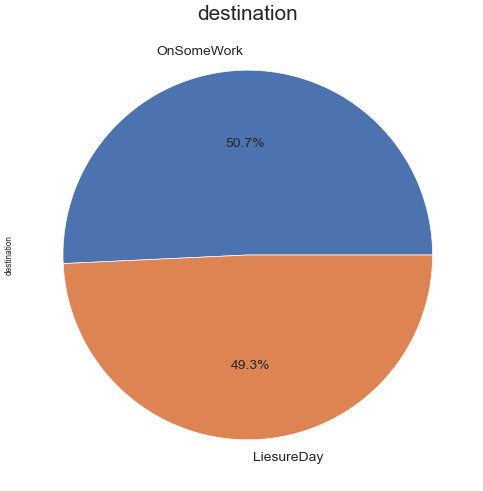

********************************************************************** 
 Pie plot for column name: passenger 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


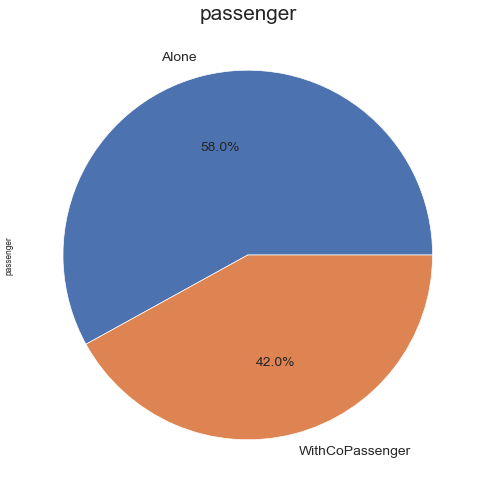

********************************************************************** 
 Pie plot for column name: weather 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


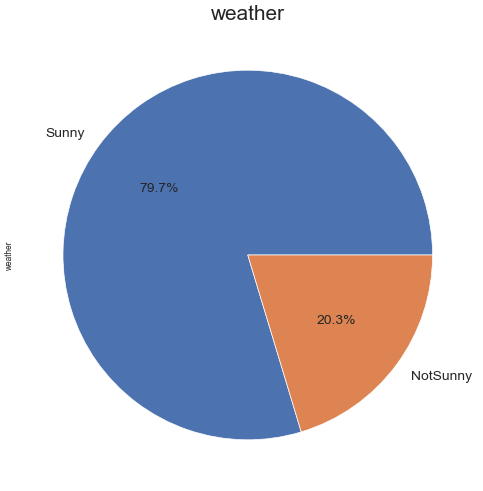

********************************************************************** 
 Pie plot for column name: temperature 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


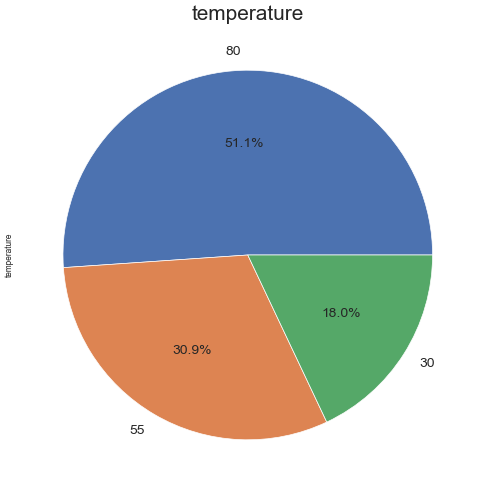

********************************************************************** 
 Pie plot for column name: coupon 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


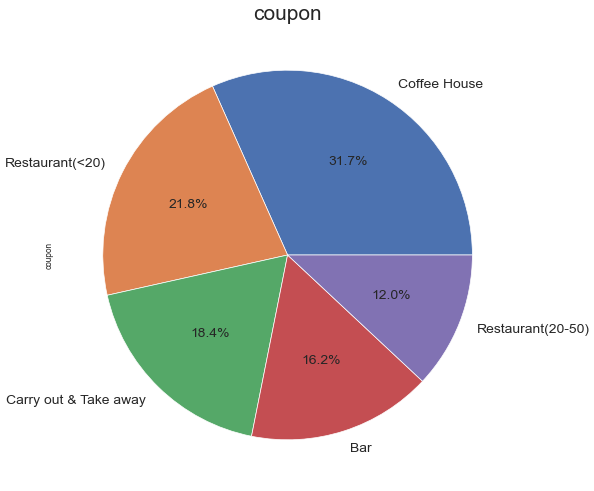

********************************************************************** 
 Pie plot for column name: expiration 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


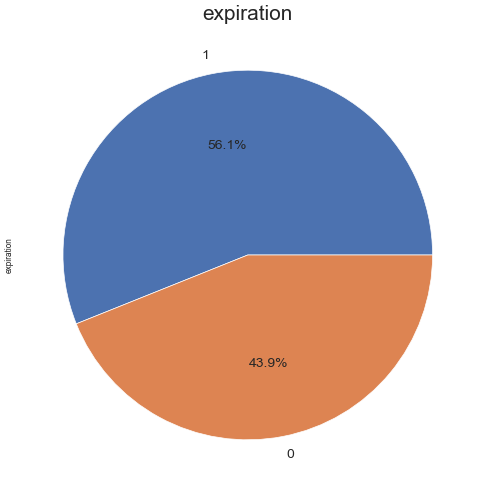

********************************************************************** 
 Pie plot for column name: gender 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


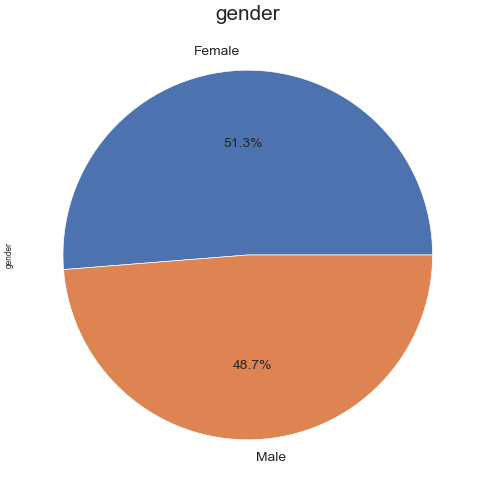

********************************************************************** 
 Pie plot for column name: age 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


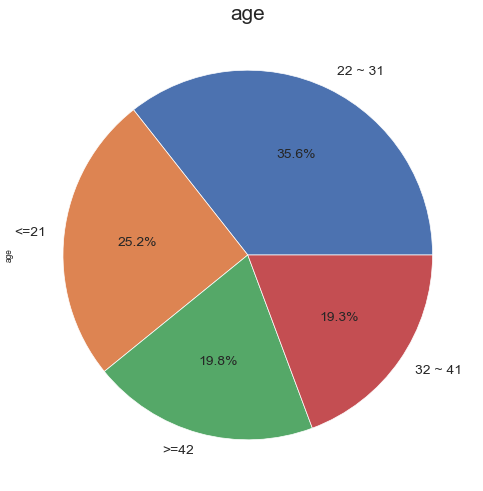

********************************************************************** 
 Pie plot for column name: maritalStatus 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


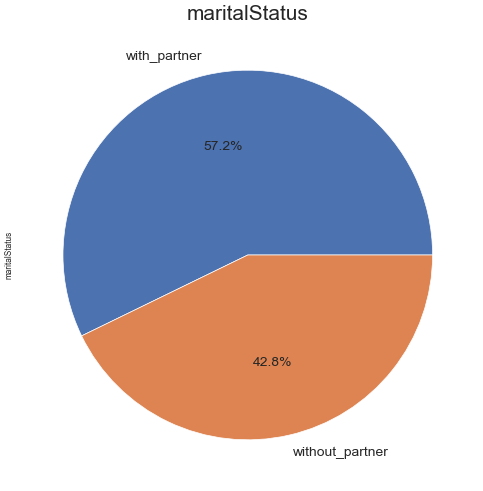

********************************************************************** 
 Pie plot for column name: has_children 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


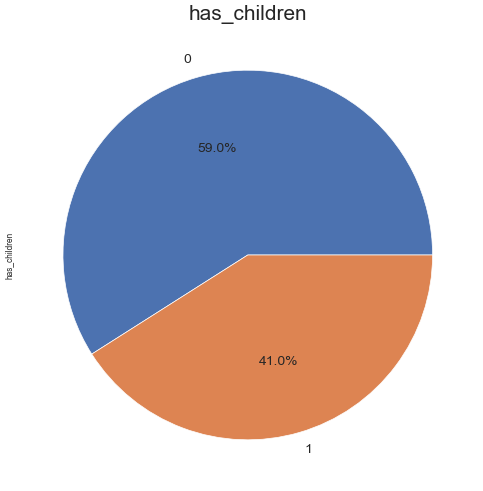

********************************************************************** 
 Pie plot for column name: education 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


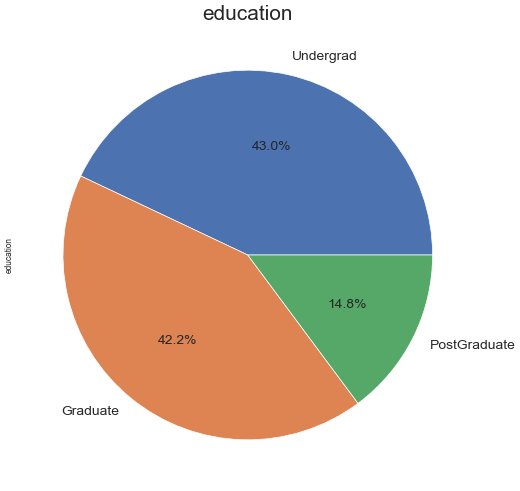

********************************************************************** 
 Pie plot for column name: occupation 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


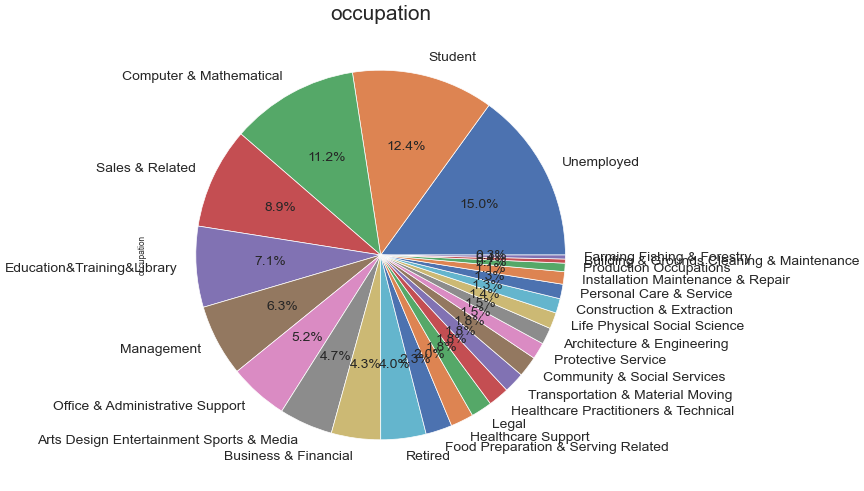

********************************************************************** 
 Pie plot for column name: income 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


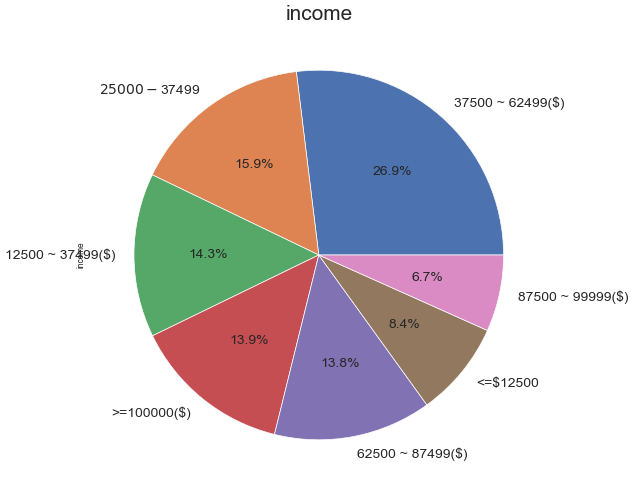

********************************************************************** 
 Pie plot for column name: Bar 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


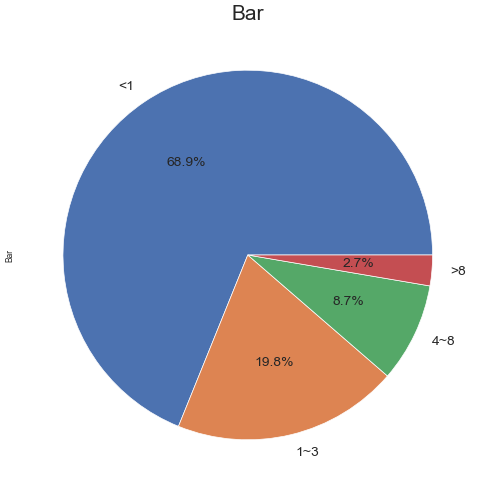

********************************************************************** 
 Pie plot for column name: CoffeeHouse 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


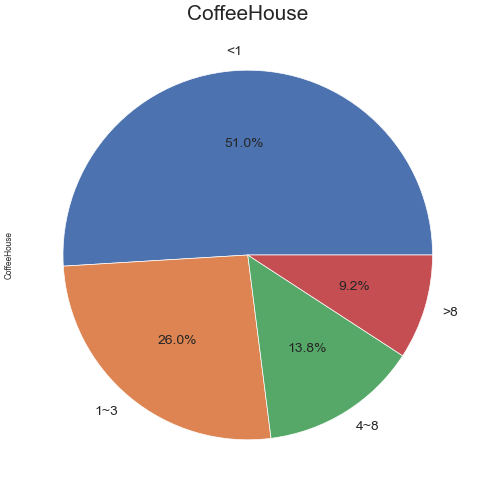

********************************************************************** 
 Pie plot for column name: CarryAway 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


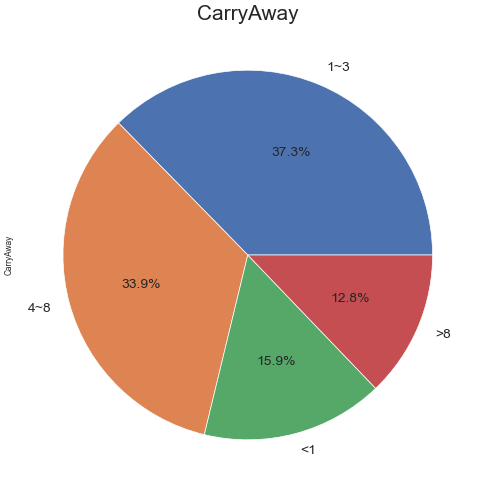

********************************************************************** 
 Pie plot for column name: RestaurantLessThan20 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


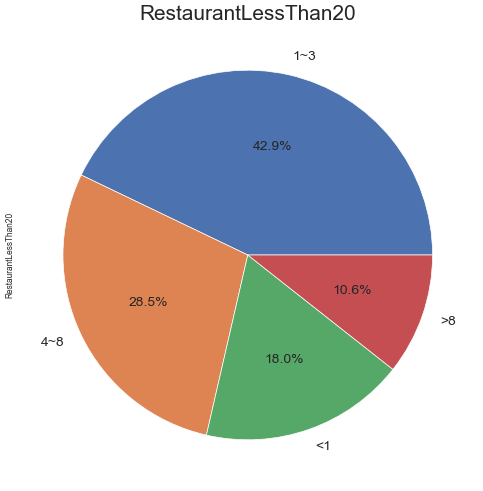

********************************************************************** 
 Pie plot for column name: Restaurant20To50 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


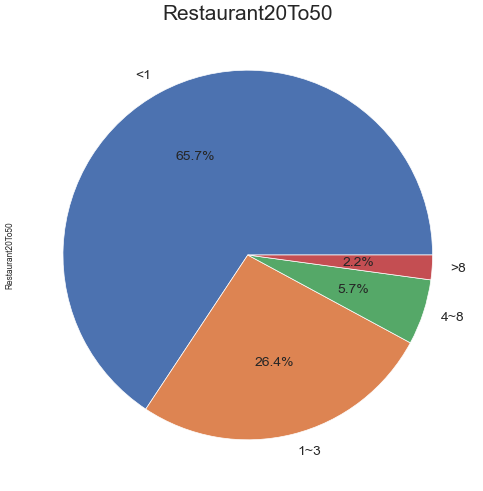

********************************************************************** 
 Pie plot for column name: toCoupon_GEQ15min 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


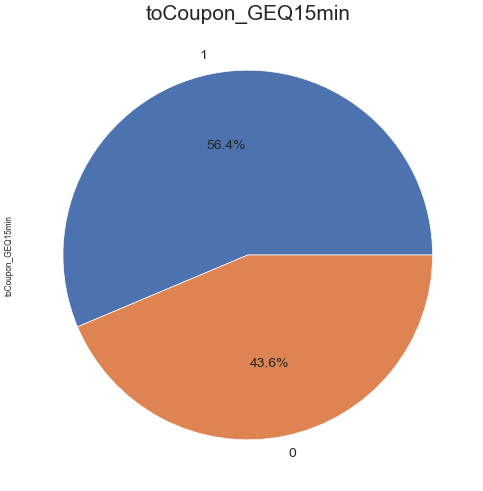

********************************************************************** 
 Pie plot for column name: toCoupon_GEQ25min 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


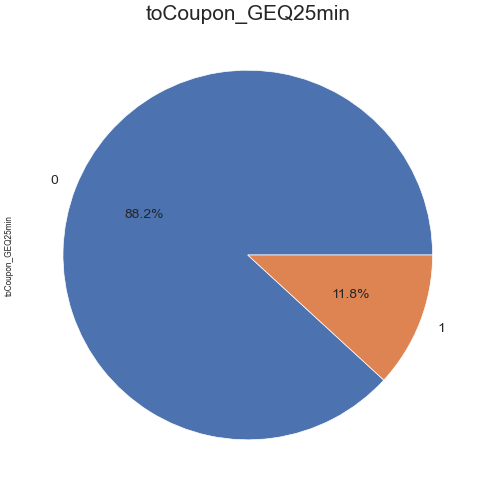

********************************************************************** 
 Pie plot for column name: Accept(Y/N?) 
 **********************************************************************
Axes(0.255833,0.11;0.513333x0.77)


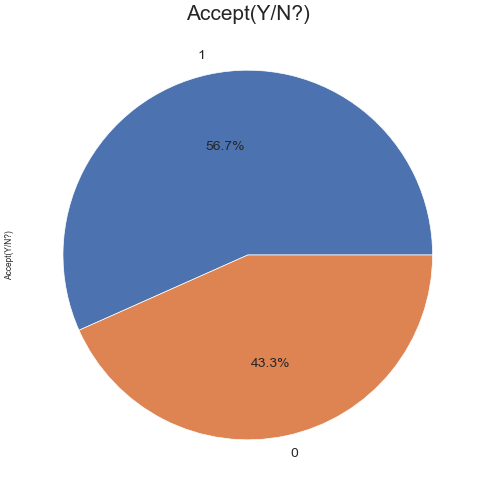

In [26]:
# Pie plot to check distribution of classes

for i in df1.columns:
    plt.figure(figsize=(18,12), dpi=50)
    value = df1[i].value_counts()
    print('*******'*10,'\n','Pie plot for column name:',i,'\n','*******'*10)
    print(value.plot(kind='pie', autopct='%1.1f%%', fontsize = 20))
    plt.title(i, fontsize=30, loc='center')
    plt.show()

********************************************************************** 
 Barplot for column name: destination 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


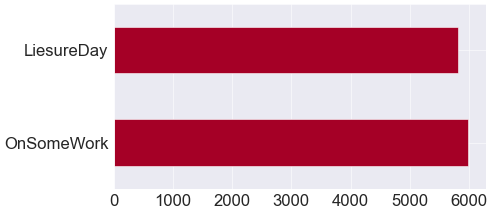

********************************************************************** 
 Barplot for column name: passenger 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


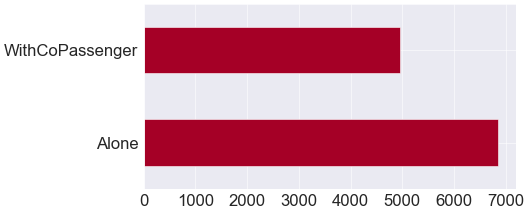

********************************************************************** 
 Barplot for column name: weather 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


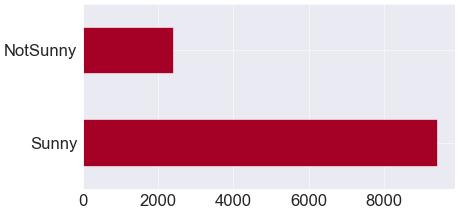

********************************************************************** 
 Barplot for column name: temperature 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


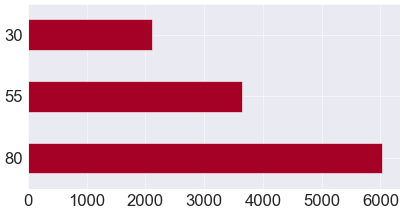

********************************************************************** 
 Barplot for column name: coupon 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


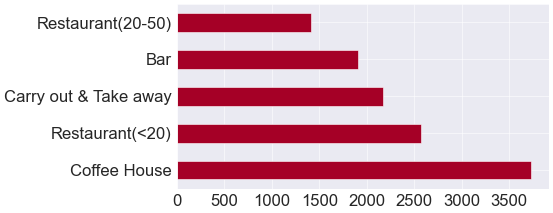

********************************************************************** 
 Barplot for column name: expiration 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


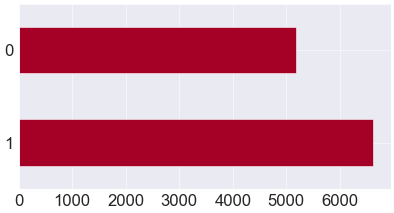

********************************************************************** 
 Barplot for column name: gender 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


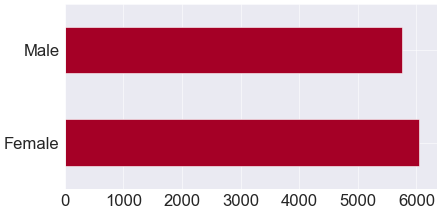

********************************************************************** 
 Barplot for column name: age 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


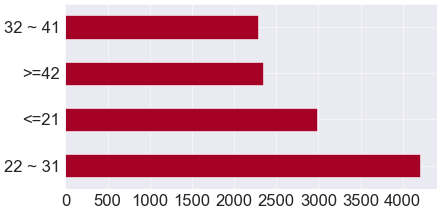

********************************************************************** 
 Barplot for column name: maritalStatus 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


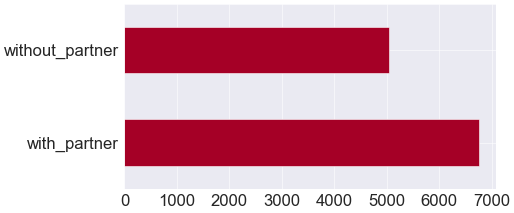

********************************************************************** 
 Barplot for column name: has_children 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


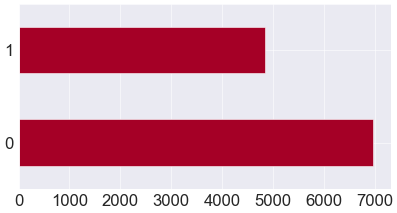

********************************************************************** 
 Barplot for column name: education 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


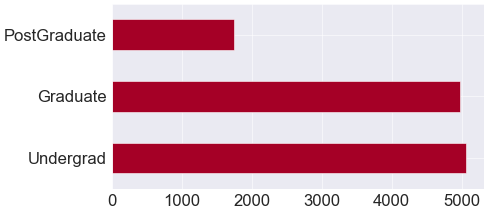

********************************************************************** 
 Barplot for column name: occupation 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


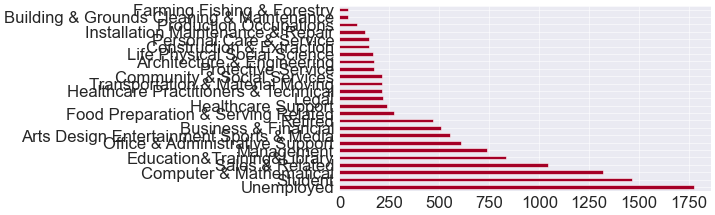

********************************************************************** 
 Barplot for column name: income 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


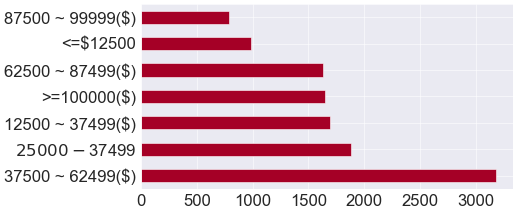

********************************************************************** 
 Barplot for column name: Bar 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


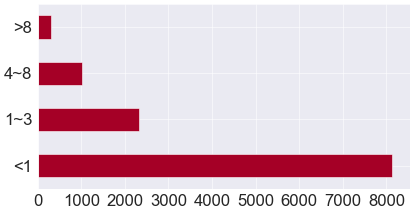

********************************************************************** 
 Barplot for column name: CoffeeHouse 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


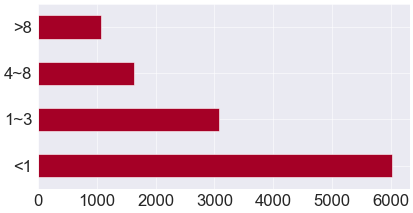

********************************************************************** 
 Barplot for column name: CarryAway 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


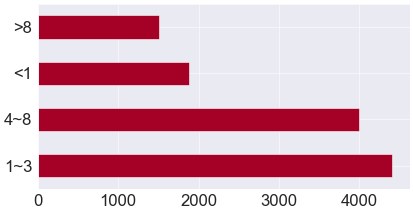

********************************************************************** 
 Barplot for column name: RestaurantLessThan20 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


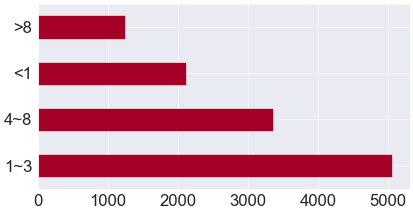

********************************************************************** 
 Barplot for column name: Restaurant20To50 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


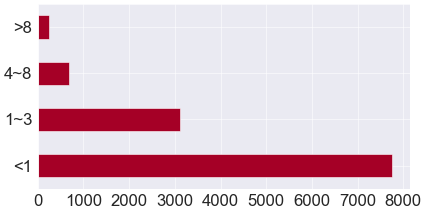

********************************************************************** 
 Barplot for column name: toCoupon_GEQ15min 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


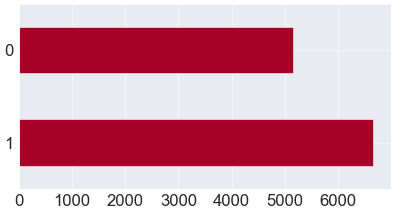

********************************************************************** 
 Barplot for column name: toCoupon_GEQ25min 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


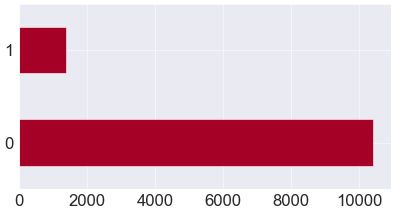

********************************************************************** 
 Barplot for column name: Accept(Y/N?) 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


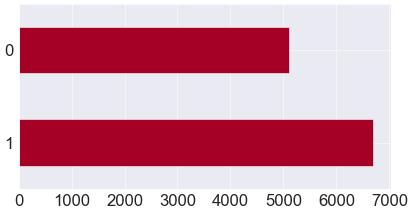

In [27]:
# Count Plot for all features
for i in df1.columns:
    plt.figure(figsize=(12,6), dpi=40)
    value = df1[i].value_counts()
    print('*******'*10,'\n','Barplot for column name:',i,'\n','*******'*10)
    print(value.plot(kind='barh', fontsize = 30, colormap= 'RdYlBu'))
    plt.show()

********************************************************************** 
 Barplot for column name: destination 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

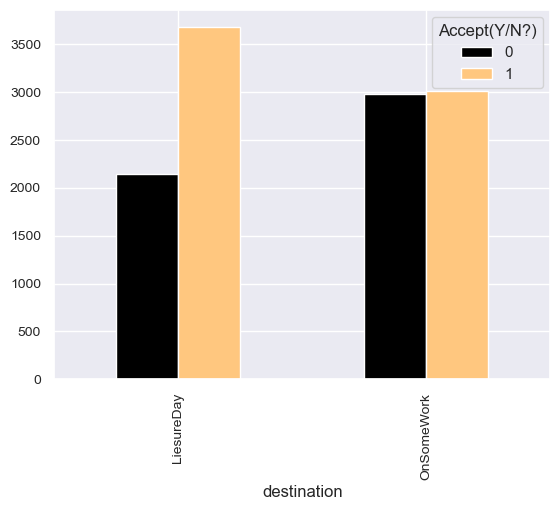

********************************************************************** 
 Barplot for column name: passenger 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

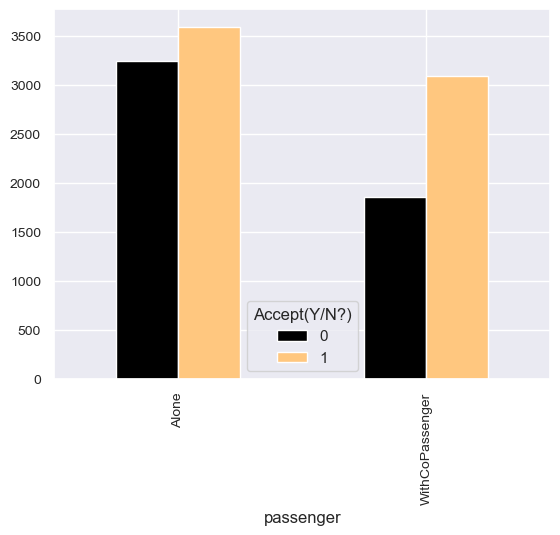

********************************************************************** 
 Barplot for column name: weather 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

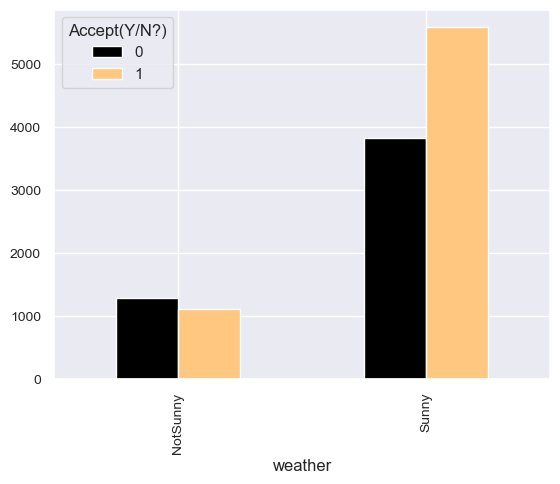

********************************************************************** 
 Barplot for column name: temperature 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

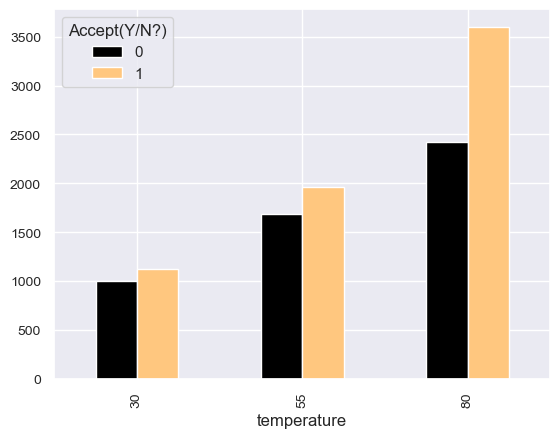

********************************************************************** 
 Barplot for column name: coupon 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

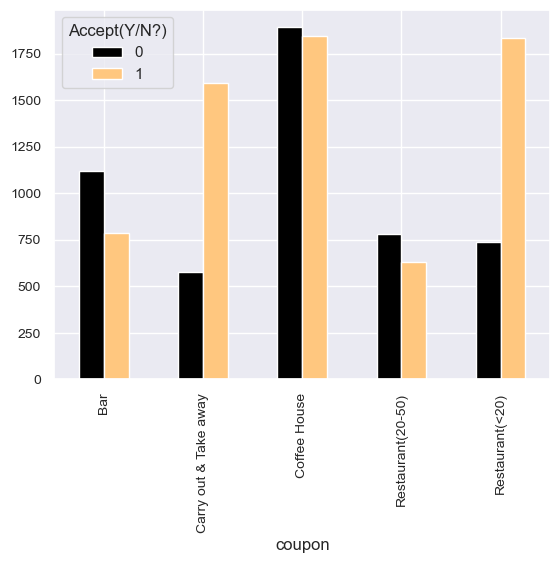

********************************************************************** 
 Barplot for column name: expiration 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

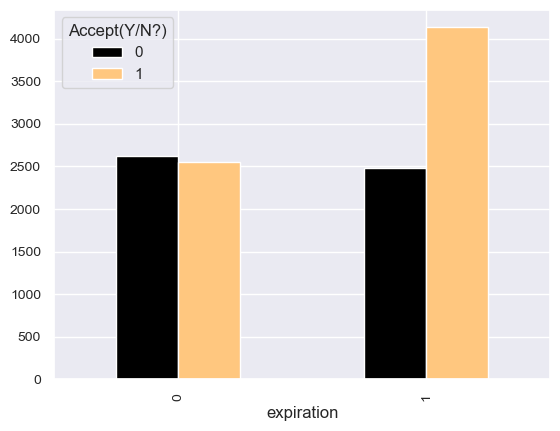

********************************************************************** 
 Barplot for column name: gender 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

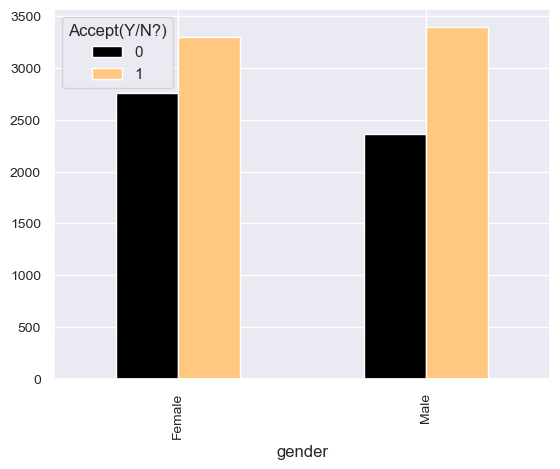

********************************************************************** 
 Barplot for column name: age 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

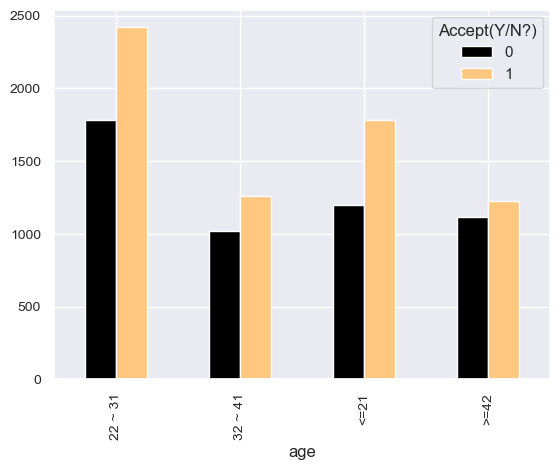

********************************************************************** 
 Barplot for column name: maritalStatus 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

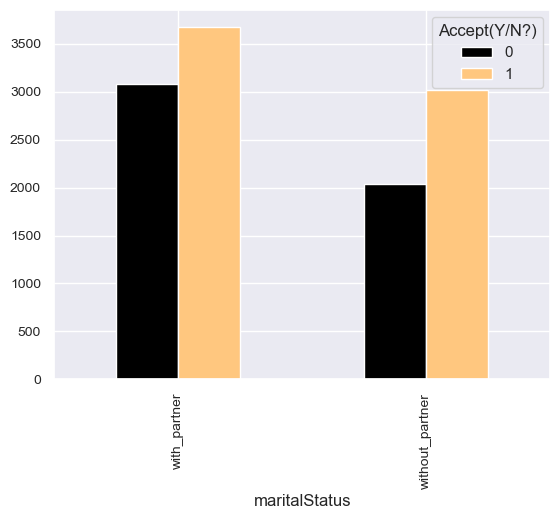

********************************************************************** 
 Barplot for column name: has_children 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

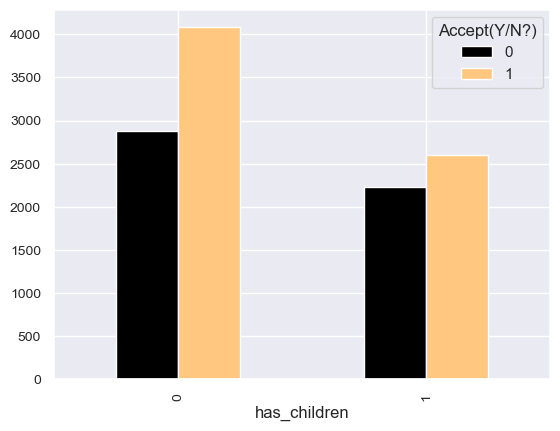

********************************************************************** 
 Barplot for column name: education 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

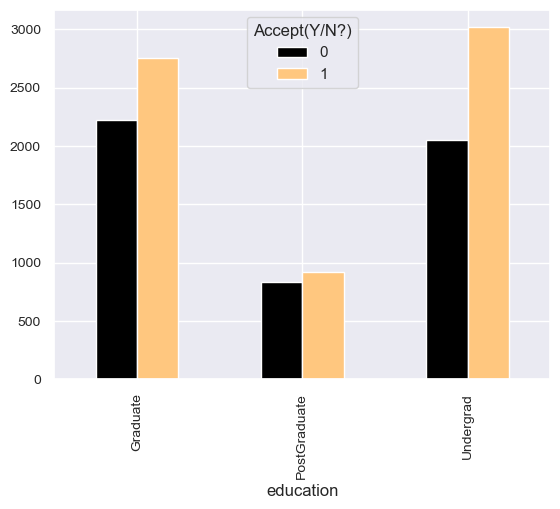

********************************************************************** 
 Barplot for column name: occupation 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

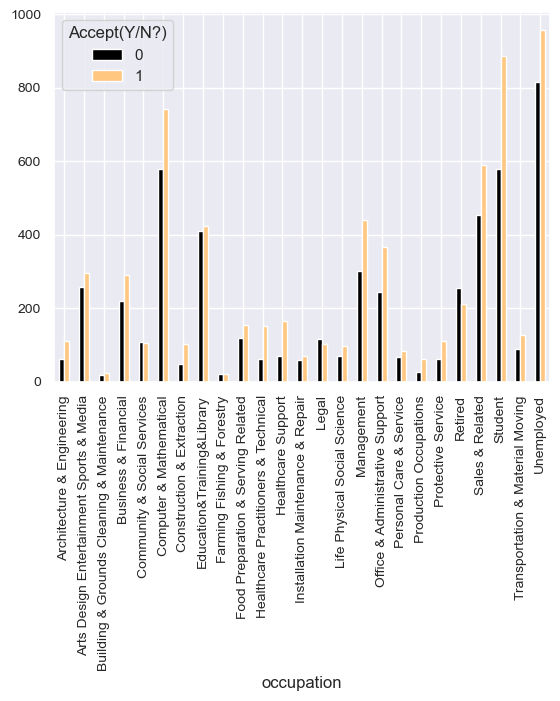

********************************************************************** 
 Barplot for column name: income 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

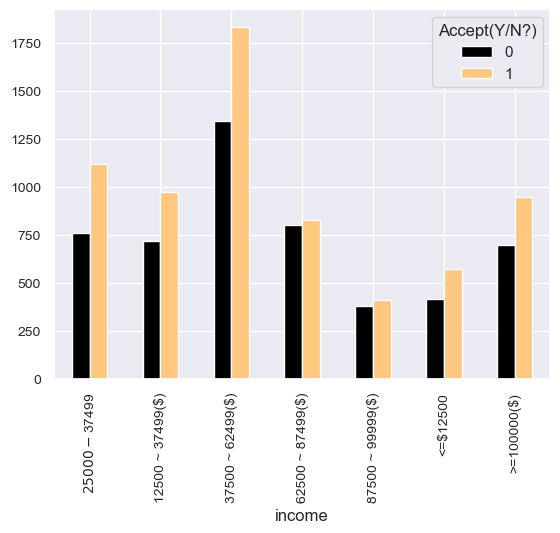

********************************************************************** 
 Barplot for column name: Bar 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

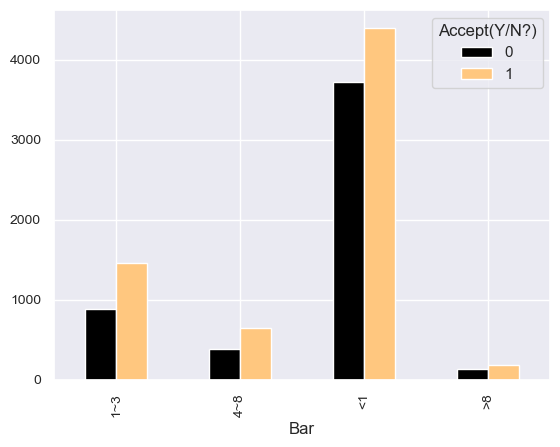

********************************************************************** 
 Barplot for column name: CoffeeHouse 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

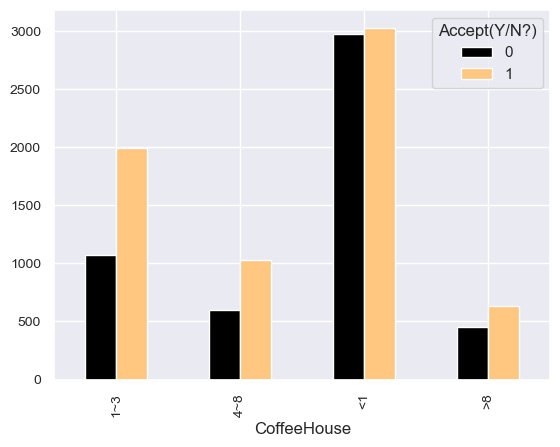

********************************************************************** 
 Barplot for column name: CarryAway 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

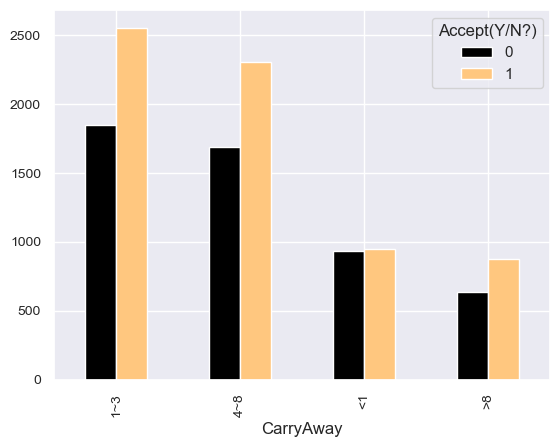

********************************************************************** 
 Barplot for column name: RestaurantLessThan20 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

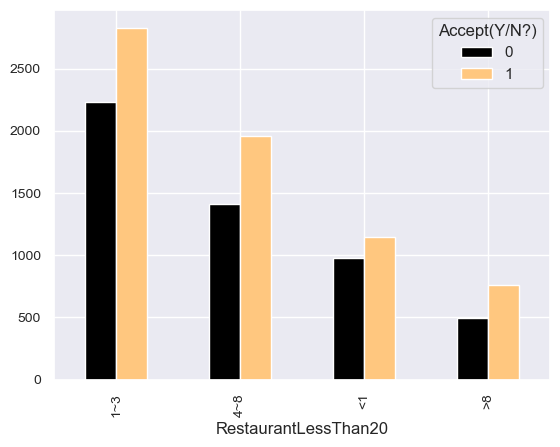

********************************************************************** 
 Barplot for column name: Restaurant20To50 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

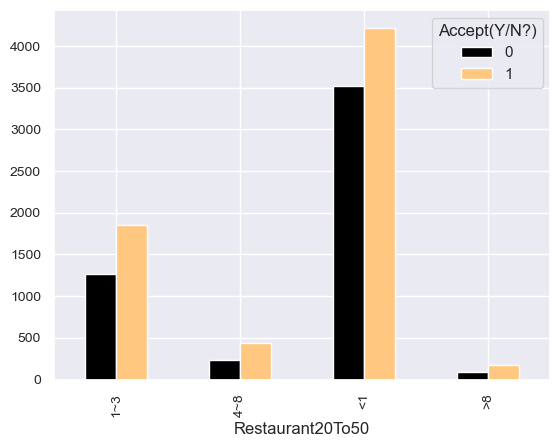

********************************************************************** 
 Barplot for column name: toCoupon_GEQ15min 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

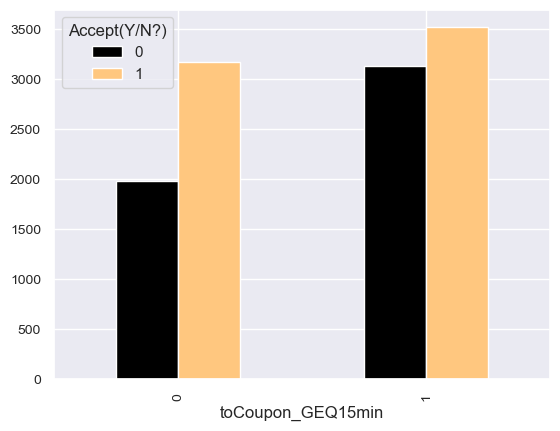

********************************************************************** 
 Barplot for column name: toCoupon_GEQ25min 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

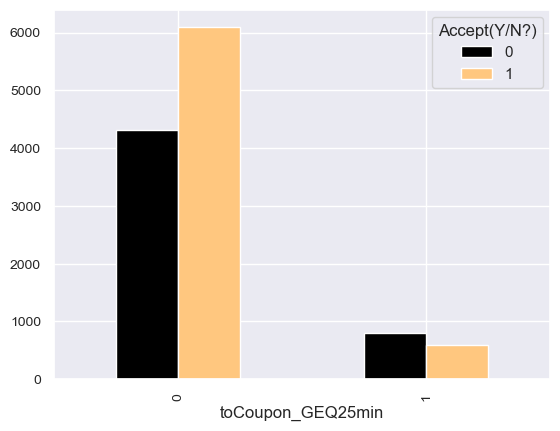

********************************************************************** 
 Barplot for column name: Accept(Y/N?) 
 **********************************************************************
Axes(0.125,0.11;0.775x0.77)


<Figure size 480x240 with 0 Axes>

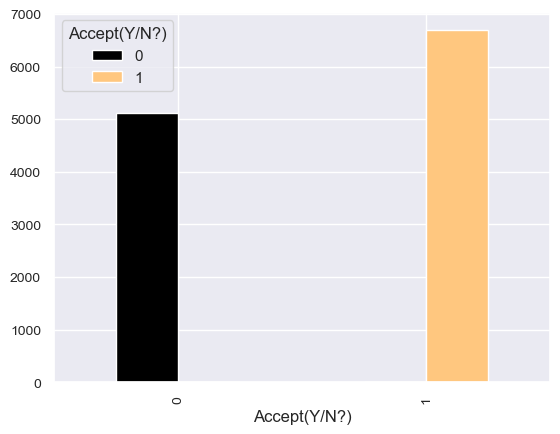

In [28]:
# Bivariate Analysis of columns with Target Variable
for i in df1.columns:
    plt.figure(figsize=(12,6), dpi=40)
    value = pd.crosstab(df1[i], df1['Accept(Y/N?)'])
    print('*******'*10,'\n','Barplot for column name:',i,'\n','*******'*10)
    print(value.plot(kind='bar', fontsize=10, colormap= 'copper', sort_columns= True))
    plt.show()

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df1, title="EDA Report")
profile

In [29]:
# Insights from EDA
df2 = df1.copy()

# Label Encoding

In [30]:
for i in df2.columns:
    df2[i] = df2[i].astype('category')
    df2[i] = df2[i].cat.codes
df2 = pd.get_dummies(df2,columns= df2.columns , drop_first=True)
df2.head()

,destination_1,passenger_1,weather_1,temperature_1,temperature_2,coupon_1,coupon_2,coupon_3,coupon_4,expiration_1,...,CarryAway_3,RestaurantLessThan20_1,RestaurantLessThan20_2,RestaurantLessThan20_3,Restaurant20To50_1,Restaurant20To50_2,Restaurant20To50_3,toCoupon_GEQ15min_1,toCoupon_GEQ25min_1,Accept(Y/N?)_1
22,0,0,1,1,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
23,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
24,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
25,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
26,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [31]:
y = df2.iloc[:,-1]
x = df2.drop('Accept(Y/N?)_1', axis=1)

# Hyper-parameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

params1 = [{'solver': ['lbfgs'], 'penalty':['l2', None], 'C':[1.0,2.0,3.0]},
           {'solver': ['sag'], 'penalty':['l2', None], 'C':[1.0,2.0,3.0]},
           {'solver': ['saga'], 'penalty':['elasticnet', 'l1', 'l2', None], 'C':[1.0,2.0,3.0]}]

grid_search1= GridSearchCV(estimator = logit,
                         param_grid = params1,
                         cv = 10)
grid_search1.fit(x,y)

print(grid_search1.best_params_)

{'C': 2.0, 'penalty': 'l1', 'solver': 'saga'}


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

params2 = [{'criterion':['gini'],'min_samples_split':[2,3,4,5,6]},
           {'criterion':['entropy'],'min_samples_split':[2,3,4,5,6]}]

grid_search2= GridSearchCV(estimator = dt,
                         param_grid = params2,
                         cv = 10)
grid_search2.fit(x,y)
print(grid_search2.best_params_)

print(grid_search2.best_params_)
# {'criterion': 'entropy', 'min_samples_split': 2}

{'criterion': 'entropy', 'min_samples_split': 6}
{'criterion': 'entropy', 'min_samples_split': 6}


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

params3 = [{'criterion':['gini'],'n_estimators':[1500,1800,2000]},
           {'criterion':['entropy'], 'n_estimators':[1500,1800,2000]}]

grid_search3= GridSearchCV(estimator = rf,
                         param_grid = params3,
                         cv = 2)
grid_search3.fit(x,y)
print(grid_search3.best_params_)

{'criterion': 'gini', 'n_estimators': 1500}


In [36]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

params4 = [{ 'n_estimators': [ 900, 1000, 1200]}]

grid_search4= GridSearchCV(estimator = etc,
                         param_grid = params4,
                         cv = 3)
grid_search4.fit(x,y)

print(grid_search4.best_params_)

{'n_estimators': 1200}


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

params5=[{'weights' : ['uniform'], 'n_neighbors':[5,7,9,11],'p':[1,2]},
        {'weights' : ['distance'], 'n_neighbors':[5,7,9,11],'p':[1,2]}]

grid_search5= GridSearchCV(estimator = knn,
                         param_grid = params5,
                         cv = 3)
grid_search5.fit(x,y)
print(grid_search5.best_params_)

print(grid_search5.best_params_)
# best.params_
# {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


In [38]:
from sklearn.svm import SVC
svc = SVC()

params6 = [{'kernel': ['linear'], 'C': [1,3,5,7,10]},
          {'kernel': ['poly'], 'C': [1,3,5,7,10]},
          {'kernel': ['sigmoid'], 'C': [1,3,5,7,10]},
          {'kernel': ['rbf'], 'C': [1,3,5,7,10], 'gamma': [0.001, 0.0001]}]

grid_search6= GridSearchCV(estimator = svc,
                         param_grid = params6,
                         cv = 3)
grid_search6.fit(x,y)
print(grid_search6.best_params_)

# best.params_
# 'C': 5, 'gamma': 0.001, 'kernel': 'rbf'

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

params7 = { 'n_estimators': [100, 200, 300, 500, 800, 1000], 'learning_rate': [0.3,0.5,0.8,1.0]}

grid_search7= GridSearchCV(estimator = gbc,
                         param_grid = params7,
                         cv = 3)
grid_search7.fit(x,y)
print(grid_search7.best_params_)

# best.params_
# {'learning_rate': 0.3, 'n_estimators': 100}

{'learning_rate': 0.3, 'n_estimators': 100}


In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

params8 = { 'n_estimators': [100, 200, 300, 500, 800, 1000]}

grid_search8= GridSearchCV(estimator = ada,
                         param_grid = params8,
                         cv = 3)
grid_search8.fit(x,y)

print(grid_search8.best_params_)

{'n_estimators': 100}


# Model Building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [42]:
# Train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=111)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8257, 65) (3540, 65) (8257,) (3540,)


# Logistic Regression

In [43]:
# Logistic Regression

logit = LogisticRegression(C= 1.0, penalty= 'l1', solver= 'saga')
logit.fit(x_train, y_train)

y_train_pred_logit = logit.predict(x_train)
y_test_pred_logit = logit.predict(x_test)

print("\nLogistic Regression\n")
print("Trainning Accuracy:", round(accuracy_score(y_train, y_train_pred_logit),2))
print("Testing Accuracy:", round(accuracy_score(y_test,y_test_pred_logit),2))
print()

# Cross Validating

scores1 = cross_val_score(logit, x, y, cv=10, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores1.min(),2))
print("The mean accuracy of the model is: ", round(scores1.mean(),2))
print("The max accuracy of the model is: ", round(scores1.max(),2))


Logistic Regression

Trainning Accuracy: 0.68
Testing Accuracy: 0.67

The min accuracy of the model is:  0.63
The mean accuracy of the model is:  0.66
The max accuracy of the model is:  0.69


### Confusion Matrix & Classification Report

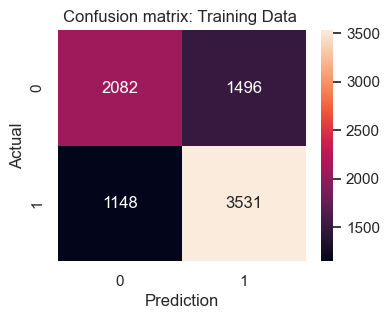

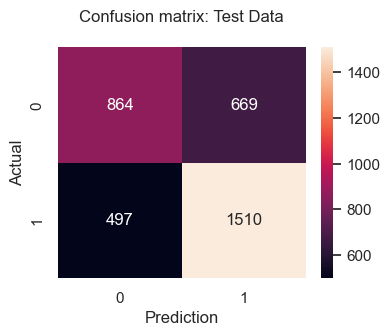

In [44]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_logit), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_logit), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [45]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_logit))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_logit))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      3578
           1       0.70      0.75      0.73      4679

    accuracy                           0.68      8257
   macro avg       0.67      0.67      0.67      8257
weighted avg       0.68      0.68      0.68      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.56      0.60      1533
           1       0.69      0.75      0.72      2007

    accuracy                           0.67      3540
   macro avg       0.66      0.66      0.66      3540
weighted avg       0.67      0.67      0.67      3540



### ROC_AUC Curve for Logistic Regression

ROC-AUC Score:  0.66


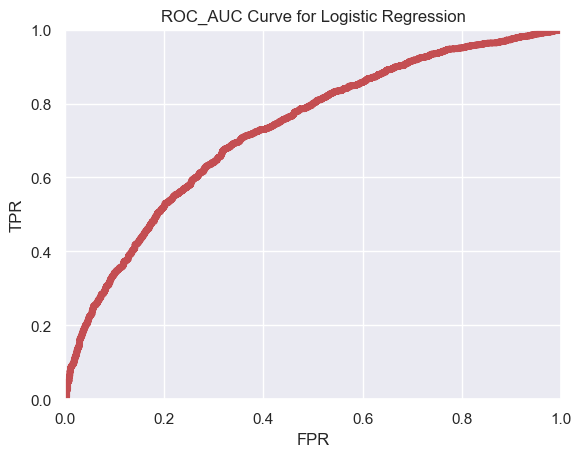

In [46]:
auc_logit= roc_auc_score(y_test, y_test_pred_logit)
print("ROC-AUC Score: ",round(auc_logit,2))
fpr, tpr, threshold = roc_curve(y_test, logit.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

###########################################################################################################################

# Decision Tree Classifier

In [47]:
dt = DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 2)
dt.fit(x_train,y_train)

y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

print("\nDecisionTreeClassifier\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_dt),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_dt),2))
print()

# Cross Validating
scores2 = cross_val_score(dt,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores2.min(),2))
print("The mean accuracy of the model is: ", round(scores2.mean(),2))
print("The max accuracy of the model is: ", round(scores2.max(),2))


DecisionTreeClassifier

Accuracy on Training Data: 0.98
Accuracy on Test Data: 0.65

The min accuracy of the model is:  0.59
The mean accuracy of the model is:  0.59
The max accuracy of the model is:  0.6


### Confusion Matrix & Classification Report

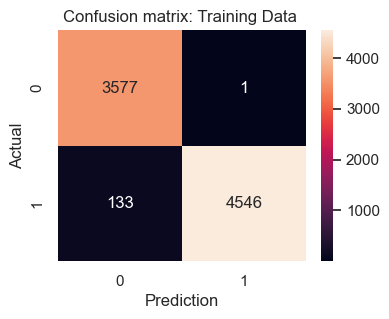

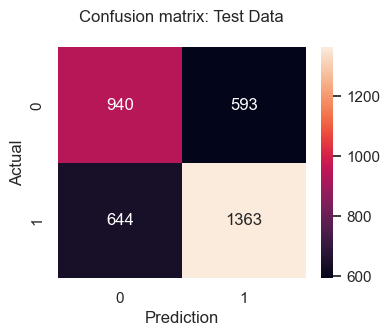

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_dt), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_dt), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [49]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_dt))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_dt))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3578
           1       1.00      0.97      0.99      4679

    accuracy                           0.98      8257
   macro avg       0.98      0.99      0.98      8257
weighted avg       0.98      0.98      0.98      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60      1533
           1       0.70      0.68      0.69      2007

    accuracy                           0.65      3540
   macro avg       0.65      0.65      0.65      3540
weighted avg       0.65      0.65      0.65      3540



### ROC_AUC Curve for Decision Tree

ROC-AUC Score:  0.65


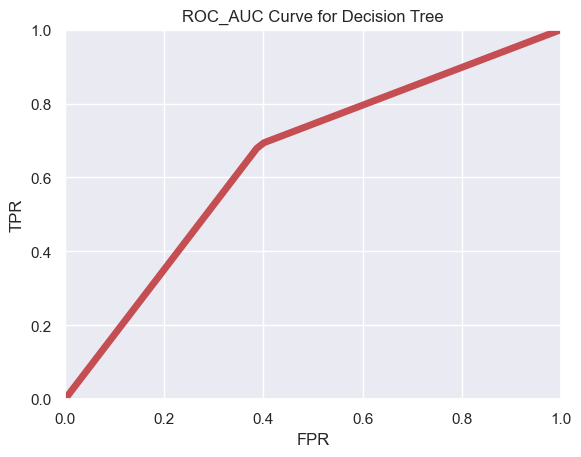

In [50]:
auc_dt =roc_auc_score(y_test, y_test_pred_dt)
print("ROC-AUC Score: ",round(auc_dt,2))
fpr, tpr, threshold = roc_curve(y_test, dt.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for Decision Tree")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

###########################################################################################################################

# RandomForestClassifier

In [51]:
rf = RandomForestClassifier(criterion='gini', n_estimators= 1800)
rf.fit(x_train, y_train)
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

print("\nRandomForestClassifier\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_rf),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_rf),2))
print()

# Cross Validating
scores3 = cross_val_score(rf,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores3.min(),2))
print("The mean accuracy of the model is: ", round(scores3.mean(),2))
print("The max accuracy of the model is: ", round(scores3.max(),2))


RandomForestClassifier

Accuracy on Training Data: 0.98
Accuracy on Test Data: 0.74

The min accuracy of the model is:  0.64
The mean accuracy of the model is:  0.66
The max accuracy of the model is:  0.67


### Confusion Matrix & Classification Report

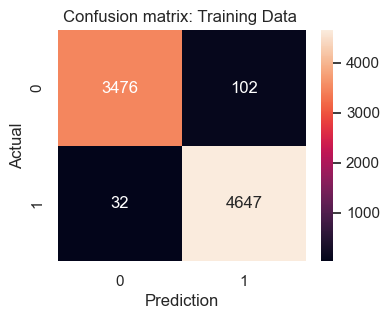

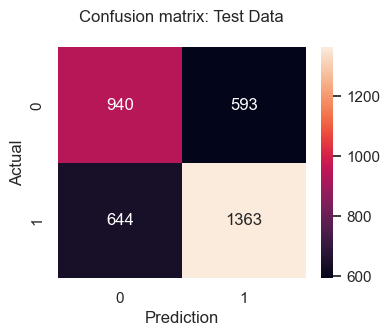

In [52]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_rf), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_dt), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [53]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_rf))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_rf))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3578
           1       0.98      0.99      0.99      4679

    accuracy                           0.98      8257
   macro avg       0.98      0.98      0.98      8257
weighted avg       0.98      0.98      0.98      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.68      1533
           1       0.75      0.82      0.78      2007

    accuracy                           0.74      3540
   macro avg       0.74      0.73      0.73      3540
weighted avg       0.74      0.74      0.74      3540



### ROC_AUC Curve for Random Forest

ROC-AUC Score:  0.73


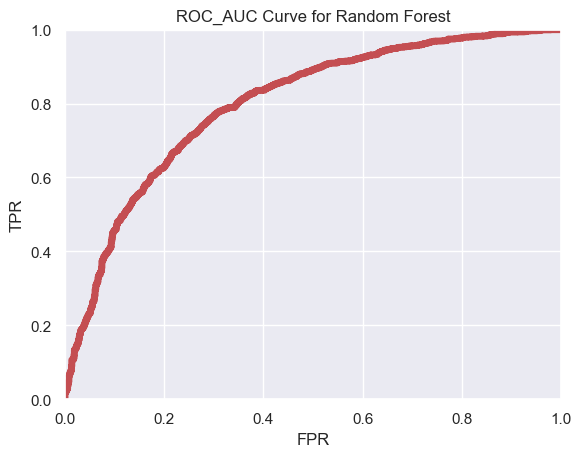

In [54]:
auc_rf =roc_auc_score(y_test, y_test_pred_rf)
print("ROC-AUC Score: ",round(auc_rf,2))
fpr, tpr, threshold = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

###########################################################################################################################

# ExtraTreesClassifier

In [55]:
etc = ExtraTreesClassifier(n_estimators=1000)
etc.fit(x_train, y_train)
y_train_pred_etc = etc.predict(x_train)
y_test_pred_etc = etc.predict(x_test)

print("\nExtraTreesClassifier\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_etc),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_etc),2))
print()

scores4= cross_val_score(etc,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores4.min(),2))
print("The mean accuracy of the model is: ", round(scores4.mean(),2))
print("The max accuracy of the model is: ", round(scores4.max(),2))


ExtraTreesClassifier

Accuracy on Training Data: 0.98
Accuracy on Test Data: 0.73

The min accuracy of the model is:  0.64
The mean accuracy of the model is:  0.65
The max accuracy of the model is:  0.66


### Confusion Matrix & Classification Report

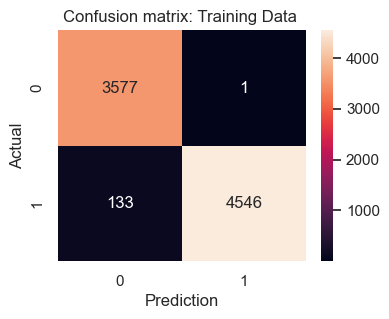

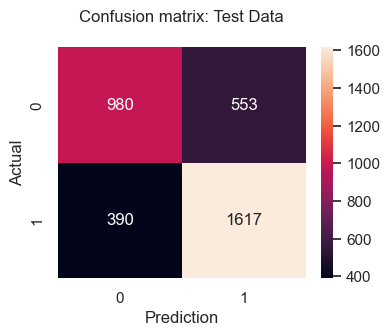

In [56]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_etc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_etc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [57]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_etc))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_etc))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3578
           1       1.00      0.97      0.99      4679

    accuracy                           0.98      8257
   macro avg       0.98      0.99      0.98      8257
weighted avg       0.98      0.98      0.98      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.68      1533
           1       0.75      0.81      0.77      2007

    accuracy                           0.73      3540
   macro avg       0.73      0.72      0.72      3540
weighted avg       0.73      0.73      0.73      3540



### ROC_AUC Curve for ExtraTreesClassifier

ROC-AUC Score:  0.72


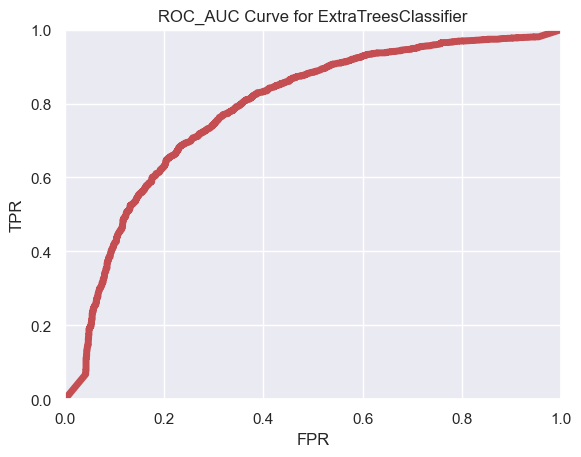

In [58]:
auc_etc =roc_auc_score(y_test, y_test_pred_etc)
print("ROC-AUC Score: ",round(auc_etc,2))
fpr, tpr, threshold = roc_curve(y_test, etc.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for ExtraTreesClassifier")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

###########################################################################################################################

# KNN

In [59]:
knn = KNeighborsClassifier(n_neighbors=11,weights='uniform', p=1)
knn.fit(x_train, y_train)
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)

print("\nKNN\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_knn),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_knn),2))
print()

scores5= cross_val_score(knn,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores5.min(),2))
print("The mean accuracy of the model is: ", round(scores5.mean(),2))
print("The max accuracy of the model is: ", round(scores5.max(),2))


KNN

Accuracy on Training Data: 0.75
Accuracy on Test Data: 0.68

The min accuracy of the model is:  0.57
The mean accuracy of the model is:  0.6
The max accuracy of the model is:  0.61


### Confusion Matrix & Classification Report

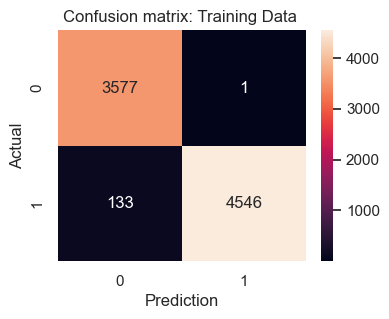

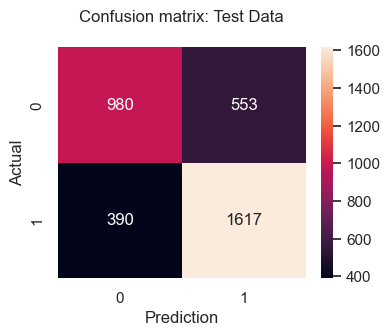

In [60]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_etc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_etc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [61]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_knn))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_knn))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      3578
           1       0.75      0.82      0.78      4679

    accuracy                           0.75      8257
   macro avg       0.74      0.73      0.74      8257
weighted avg       0.74      0.75      0.74      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.57      0.61      1533
           1       0.70      0.77      0.73      2007

    accuracy                           0.68      3540
   macro avg       0.68      0.67      0.67      3540
weighted avg       0.68      0.68      0.68      3540



### ROC_AUC Curve for KNN

ROC-AUC Score:  0.67


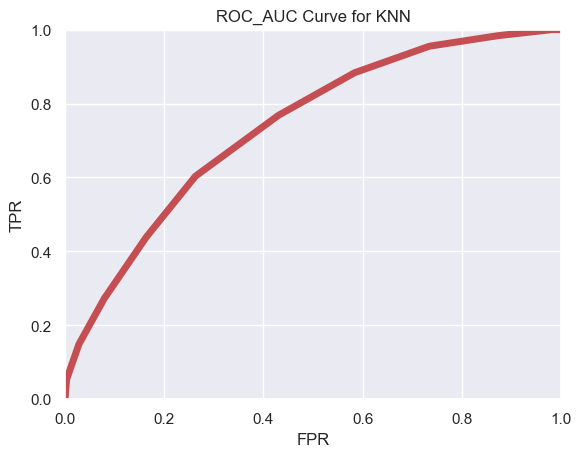

In [62]:
auc_knn =roc_auc_score(y_test, y_test_pred_knn)
print("ROC-AUC Score: ",round(auc_knn,2))
fpr, tpr, threshold = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for KNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

###########################################################################################################################

# SVC

In [63]:
svc = SVC(kernel='rbf', C=5, gamma=0.001)
svc.fit(x_train,y_train)
y_train_pred_svc = svc.predict(x_train)
y_test_pred_svc = svc.predict(x_test)

print("\nSVC\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_svc),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_svc),2))
print()

scores6= cross_val_score(svc,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores6.min(),2))
print("The mean accuracy of the model is: ", round(scores6.mean(),2))
print("The max accuracy of the model is: ", round(scores6.max(),2))


SVC

Accuracy on Training Data: 0.68
Accuracy on Test Data: 0.67

The min accuracy of the model is:  0.65
The mean accuracy of the model is:  0.66
The max accuracy of the model is:  0.67


### Confusion Matrix & Classification Report

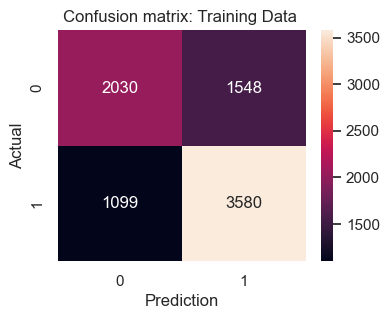

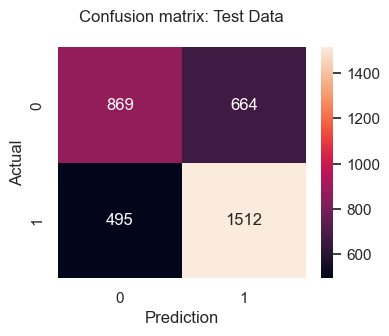

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_svc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_svc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [65]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_svc))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_svc))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.57      0.61      3578
           1       0.70      0.77      0.73      4679

    accuracy                           0.68      8257
   macro avg       0.67      0.67      0.67      8257
weighted avg       0.68      0.68      0.68      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.57      0.60      1533
           1       0.69      0.75      0.72      2007

    accuracy                           0.67      3540
   macro avg       0.67      0.66      0.66      3540
weighted avg       0.67      0.67      0.67      3540



### ROC_AUC Curve for SVC

In [66]:
auc_svc =roc_auc_score(y_test, y_test_pred_svc)
print("ROC-AUC Score: ",round(auc_svc,2))
# fpr, tpr, threshold = roc_curve(y_test, svc.predict_proba(x_test)[:,1])

# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.0])
# plt.title("ROC_AUC Curve for GBC")
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.plot(fpr,tpr, color='r', lw=5)
# plt.show()

ROC-AUC Score:  0.66


###########################################################################################################################

# GradientBoostingClassifier

In [67]:
gbc = GradientBoostingClassifier(learning_rate= 0.3, n_estimators= 100)
gbc.fit(x_train, y_train)

y_train_pred_gbc = gbc.predict(x_train)
y_test_pred_gbc = gbc.predict(x_test)

print("\nGradientBoostingClassifier\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_gbc),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_gbc),2))
print()

scores7 = cross_val_score(gbc,x,y, cv=20, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores7.min(),2))
print("The mean accuracy of the model is: ", round(scores7.mean(),2))
print("The max accuracy of the model is: ", round(scores7.max(),2))


GradientBoostingClassifier

Accuracy on Training Data: 0.75
Accuracy on Test Data: 0.71

The min accuracy of the model is:  0.53
The mean accuracy of the model is:  0.64
The max accuracy of the model is:  0.72


### Confusion Matrix & Classification Report

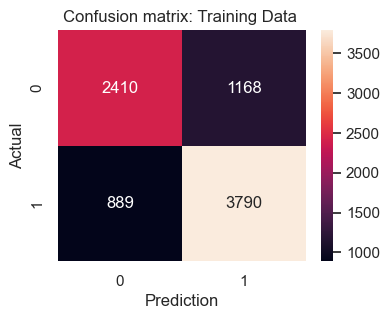

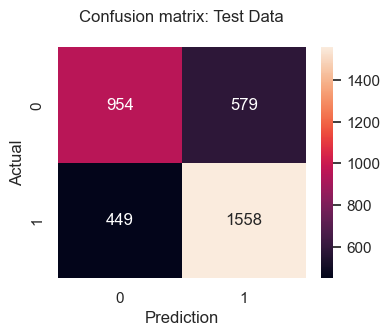

In [68]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_gbc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_gbc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [69]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_gbc))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_gbc))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70      3578
           1       0.76      0.81      0.79      4679

    accuracy                           0.75      8257
   macro avg       0.75      0.74      0.74      8257
weighted avg       0.75      0.75      0.75      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65      1533
           1       0.73      0.78      0.75      2007

    accuracy                           0.71      3540
   macro avg       0.70      0.70      0.70      3540
weighted avg       0.71      0.71      0.71      3540



### ROC_AUC Curve for GradientBoostingClassifier

ROC-AUC Score:  0.7


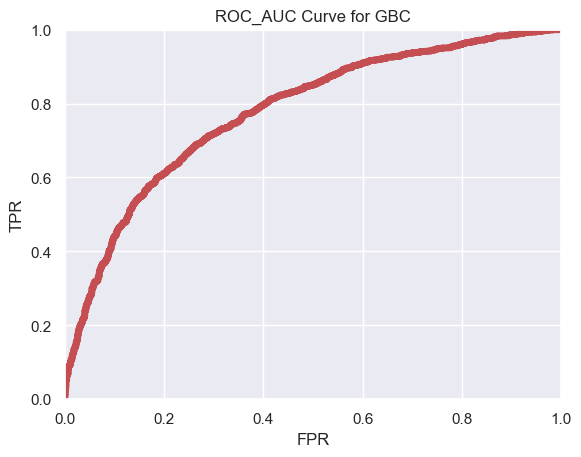

In [70]:
auc_gbc =roc_auc_score(y_test, y_test_pred_gbc)
print("ROC-AUC Score: ",round(auc_gbc,2))
fpr, tpr, threshold = roc_curve(y_test, gbc.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for GBC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

###########################################################################################################################

# AdaBoostClassifier

In [72]:
nmodels=[logit,dt,rf,etc,knn,svc,gbc]
ada= AdaBoostClassifier(estimator=dt,n_estimators= 100)
ada.fit(x_train, y_train)

y_train_pred_ada= ada.predict(x_train)
y_test_pred_ada= ada.predict(x_test)

print("\nAdaBoostClassifier\n")
print("Trainning Accuracy:", round(accuracy_score(y_train, y_train_pred_ada),2))
print("Testing Accuracy:", round(accuracy_score(y_test,y_test_pred_ada),2))
print()

scores8= cross_val_score(svc,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores8.min(),2))
print("The mean accuracy of the model is: ", round(scores8.mean(),2))
print("The max accuracy of the model is: ", round(scores8.max(),2))


AdaBoostClassifier

Trainning Accuracy: 0.98
Testing Accuracy: 0.73

The min accuracy of the model is:  0.65
The mean accuracy of the model is:  0.66
The max accuracy of the model is:  0.67


### Confusion Matrix & Classification Report

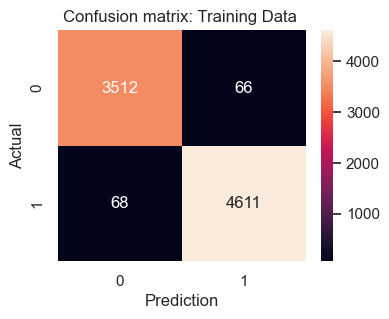

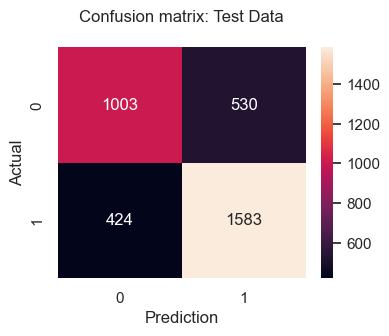

In [73]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_ada), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_ada), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [74]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_ada))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_ada))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3578
           1       0.99      0.99      0.99      4679

    accuracy                           0.98      8257
   macro avg       0.98      0.98      0.98      8257
weighted avg       0.98      0.98      0.98      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.68      1533
           1       0.75      0.79      0.77      2007

    accuracy                           0.73      3540
   macro avg       0.73      0.72      0.72      3540
weighted avg       0.73      0.73      0.73      3540



### ROC_AUC Curve for AdaBoostClassifier

ROC-AUC Score:  0.72


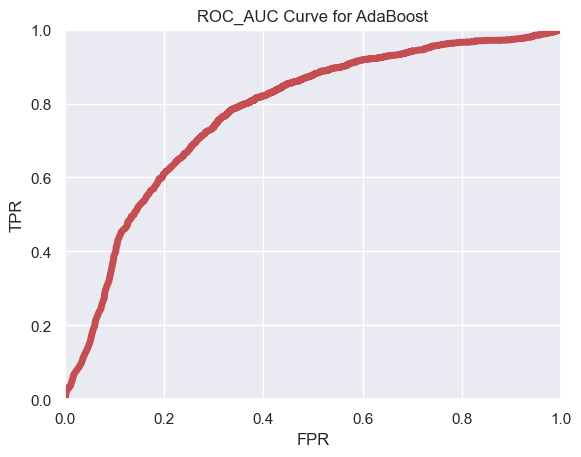

In [75]:
auc_ada =roc_auc_score(y_test, y_test_pred_ada)
print("ROC-AUC Score: ",round(auc_ada,2))
fpr, tpr, threshold = roc_curve(y_test, ada.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for AdaBoost")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

###########################################################################################################################

# XGBClassifier

In [76]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, learning_rate=0.01)
xgb.fit(x_train, y_train)

y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

print("\nXGBClassifier\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_xgb),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_xgb),2))
print()

scores9= cross_val_score(xgb,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores9.min(),2))
print("The mean accuracy of the model is: ", round(scores9.mean(),2))
print("The max accuracy of the model is: ", round(scores9.max(),2))


XGBClassifier

Accuracy on Training Data: 0.75
Accuracy on Test Data: 0.71

The min accuracy of the model is:  0.66
The mean accuracy of the model is:  0.66
The max accuracy of the model is:  0.67


### Confusion Matrix & Classification Report

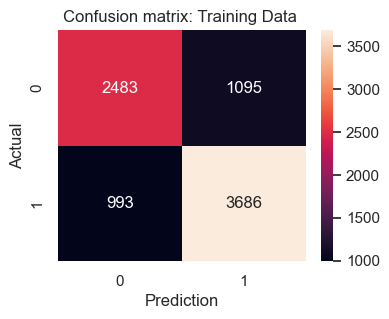

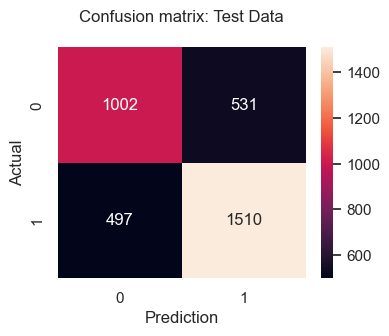

In [77]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_xgb), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_xgb), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [78]:
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_xgb))
print("\nTesting Classification Report:\n", classification_report(y_test,y_test_pred_xgb))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      3578
           1       0.77      0.79      0.78      4679

    accuracy                           0.75      8257
   macro avg       0.74      0.74      0.74      8257
weighted avg       0.75      0.75      0.75      8257


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1533
           1       0.74      0.75      0.75      2007

    accuracy                           0.71      3540
   macro avg       0.70      0.70      0.70      3540
weighted avg       0.71      0.71      0.71      3540



### ROC_AUC Curve for XGBoost

ROC-AUC Score:  0.7


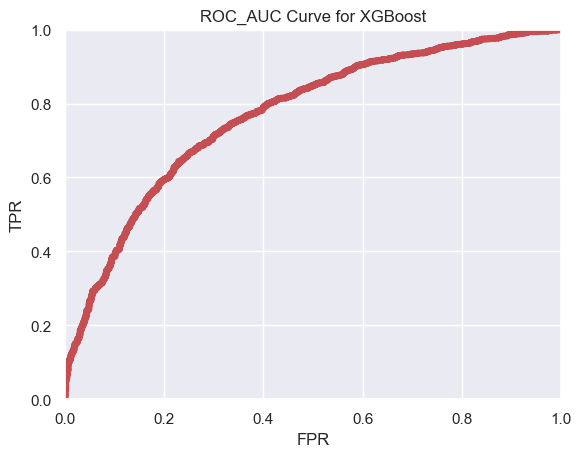

In [79]:
auc_xgb =roc_auc_score(y_test, y_test_pred_xgb)
print("ROC-AUC Score: ",round(auc_xgb,2))
fpr, tpr, threshold = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for XGBoost")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

###########################################################################################################################

# RidgeClassifier

In [80]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier(alpha=1.0,solver='saga')
rc.fit(x_train, y_train)

y_train_pred_rc = rc.predict(x_train)
y_test_pred_rc = rc.predict(x_test)

print("\nRidgeClassifier\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_rc),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_rc),2))
print()

scores10= cross_val_score(rc,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores10.min(),2))
print("The mean accuracy of the model is: ", round(scores10.mean(),2))
print("The max accuracy of the model is: ", round(scores10.max(),2))


RidgeClassifier

Accuracy on Training Data: 0.68
Accuracy on Test Data: 0.67

The min accuracy of the model is:  0.64
The mean accuracy of the model is:  0.65
The max accuracy of the model is:  0.66


### Confusion Matrix & Classification Report

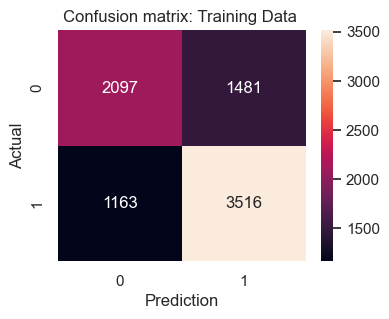

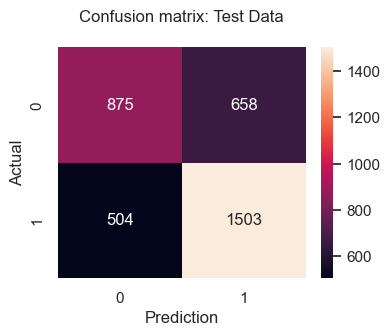

In [81]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_rc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_rc), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [82]:
print("Classification Report: Training Data\n\n", classification_report(y_train, y_train_pred_rc))
print("\n\n")
print("Classification Report: Training Data\n\n", classification_report(y_test,y_test_pred_rc))

Classification Report: Training Data

               precision    recall  f1-score   support

           0       0.64      0.59      0.61      3578
           1       0.70      0.75      0.73      4679

    accuracy                           0.68      8257
   macro avg       0.67      0.67      0.67      8257
weighted avg       0.68      0.68      0.68      8257




Classification Report: Training Data

               precision    recall  f1-score   support

           0       0.63      0.57      0.60      1533
           1       0.70      0.75      0.72      2007

    accuracy                           0.67      3540
   macro avg       0.67      0.66      0.66      3540
weighted avg       0.67      0.67      0.67      3540



### ROC_AUC Curve for RidgeClassifier

In [83]:
auc_rc =roc_auc_score(y_test, y_test_pred_rc)
print("ROC-AUC Score: ",round(auc_rc,2))
# fpr, tpr, threshold = roc_curve(y_test, rc.predict_proba(x_test)[:,1])

# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.0])
# plt.title("ROC_AUC Curve for XGBoost")
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.plot(fpr,tpr, color='r', lw=5)
# plt.show()

ROC-AUC Score:  0.66


# Gaussian Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

y_train_pred_nb = nb.predict(x_train)
y_test_pred_nb = nb.predict(x_test)

print("\nRidgeClassifier\n")
print("Accuracy on Training Data:", round(accuracy_score(y_train, y_train_pred_nb),2))
print("Accuracy on Test Data:", round(accuracy_score(y_test,y_test_pred_nb),2))
print()

scores11= cross_val_score(nb,x,y, cv=3, scoring = 'accuracy')
print("The min accuracy of the model is: ", round(scores11.min(),2))
print("The mean accuracy of the model is: ", round(scores11.mean(),2))
print("The max accuracy of the model is: ", round(scores11.max(),2))


RidgeClassifier

Accuracy on Training Data: 0.64
Accuracy on Test Data: 0.62

The min accuracy of the model is:  0.51
The mean accuracy of the model is:  0.54
The max accuracy of the model is:  0.58


### Confusion Matrix & Classification Report¶

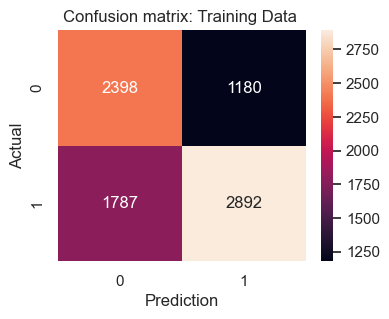

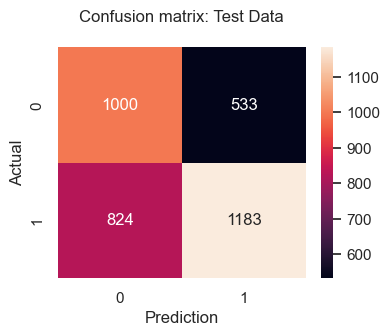

In [85]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_nb), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Training Data ")
plt.show()


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_test_pred_nb), annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title("Confusion matrix: Test Data\n")
plt.show()

In [86]:
print("Classification Report: Training Data\n\n", classification_report(y_train, y_train_pred_nb))
print("\n\n")
print("Classification Report: Training Data\n\n", classification_report(y_test,y_test_pred_nb))

Classification Report: Training Data

               precision    recall  f1-score   support

           0       0.57      0.67      0.62      3578
           1       0.71      0.62      0.66      4679

    accuracy                           0.64      8257
   macro avg       0.64      0.64      0.64      8257
weighted avg       0.65      0.64      0.64      8257




Classification Report: Training Data

               precision    recall  f1-score   support

           0       0.55      0.65      0.60      1533
           1       0.69      0.59      0.64      2007

    accuracy                           0.62      3540
   macro avg       0.62      0.62      0.62      3540
weighted avg       0.63      0.62      0.62      3540



### ROC_AUC Curve for Gaussian NB

ROC-AUC Score:  0.62


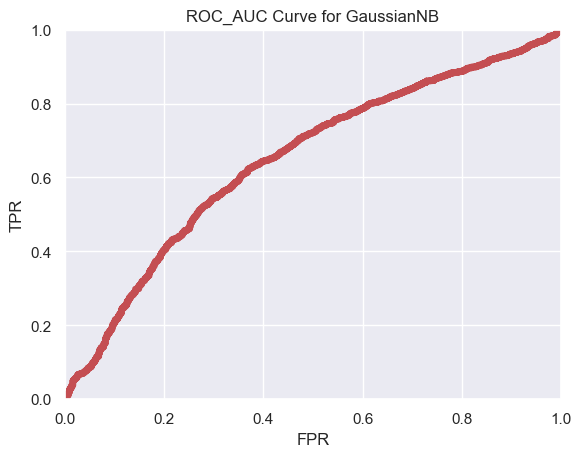

In [87]:
auc_nb =roc_auc_score(y_test, y_test_pred_nb)
print("ROC-AUC Score: ",round(auc_nb,2))
fpr, tpr, threshold = roc_curve(y_test, nb.predict_proba(x_test)[:,1])

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC_AUC Curve for GaussianNB")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr, color='r', lw=5)
plt.show()

# Voting Classifier

In [88]:
estimator=[('Decision Tree',dt),
            ('Random Forest',rf),
            ('Extra Trees Classifier',etc),
            ('Support Vector Machine',svc),
            ('GradientBoosting',gbc)]

In [ ]:
for estimator in estimators:
    m = cross_val_score(estimator[1], x , y, cv=5, scoring='accuracy')
    print(estimator[0],np.round(np.mean(m),2))

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Hard Voting

vc = VotingClassifier(estimators=estimators, voting='hard')
score = cross_val_score(vc,x,y, cv=10, scoring='accuracy')
print(np.round(score,2))

In [ ]:
estimator2=[('Logistic Regression',logit),
            ('Decision Tree',dt),
            ('Random Forest',rf)]

In [ ]:
# Soft Voting

vc1 = VotingClassifier(estimators=estimator2,voting='soft')
score1 = cross_val_score(vc1,x,y, cv=10,scoring= 'accuracy')
print(np.round(np.mean(score1),2))

###########################################################################################################################

                                            Thank You !!!